# Laboratorium Big Data
## Systemy rekomendacji 

1. % fraudów -> Stabilizacja
2. Rozkład zmiennych
3. Losowanie próbki
4. Tworzenie modelu - isolation forest / dbscan / Mahalanobis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Zadanie 1

In [6]:
numberOf1 = df["Class"].sum()
print(numberOf1)
numberOf0 = len(df) - df["Class"].sum()
print(numberOf0)

492
284315


### Zadanie 2

In [7]:
df1 = df[df["Class"]==1]
df0 = df[df["Class"]==0]

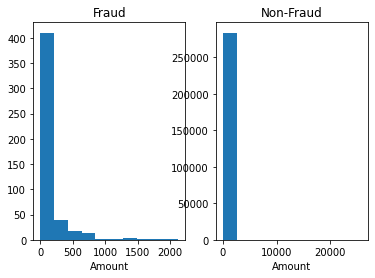

In [8]:
fig, ax = plt.subplots()

plt.subplot(1, 2, 1)
plt.hist(df1["Amount"])
plt.title("Fraud")
plt.xlabel("Amount")

plt.subplot(1, 2, 2)
plt.hist(df0["Amount"])
plt.title("Non-Fraud")
plt.xlabel("Amount")

plt.show()

<AxesSubplot:ylabel='Frequency'>

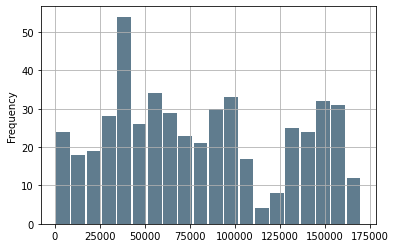

In [9]:
df1.Time.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

<AxesSubplot:ylabel='Frequency'>

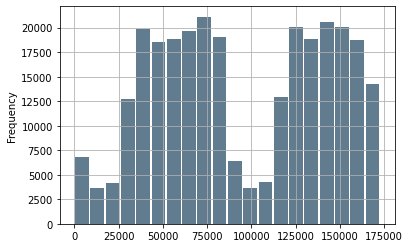

In [10]:
df0.Time.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

In [11]:
len(df1[df1["Amount"]>5000])

0

<AxesSubplot:ylabel='Frequency'>

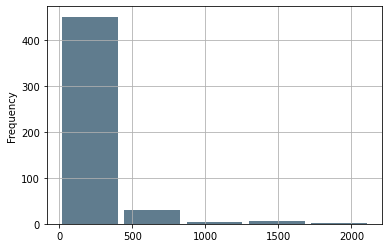

In [12]:
df1.Amount.plot.hist(grid=True, bins=5, rwidth=0.9, color='#607c8e')

<AxesSubplot:ylabel='Frequency'>

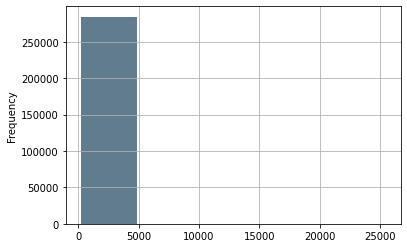

In [13]:
df0.Amount.plot.hist(grid=True, bins=5, rwidth=0.9, color='#607c8e')

<AxesSubplot:ylabel='Frequency'>

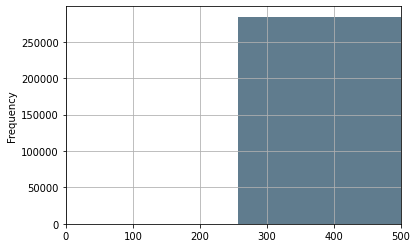

In [14]:
df0.Amount.plot.hist(grid=True, bins=5, rwidth=0.9, color='#607c8e', xlim=(0,500))

<AxesSubplot:ylabel='Frequency'>

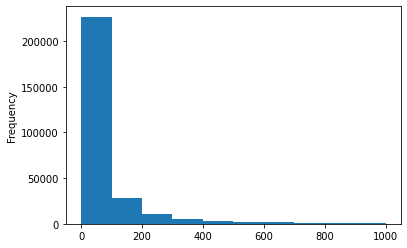

In [15]:
df0Less5000 = df0[df0["Amount"]<1000]
df0Less5000.Amount.plot.hist()

### Zadanie 3 - model

In [16]:
data = df.sample(frac = 0.1, random_state = 1)
data.shape
Fraud = data[data["Class"] == 1]
Valid = data[data["Class"] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases :', len(Fraud))
print('Valid Cases :', len(Valid))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


In [17]:
#pip install imblearn

In [18]:
#pip install imbalanced-learn

In [19]:
X = data.drop("Class", axis=1)
y = data["Class"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [21]:
#pip install numpy==1.21.4

In [26]:
from sklearn.preprocessing import RobustScaler
rtc=RobustScaler()

In [27]:
X_train_SMOTE["Time"] = rtc.fit_transform(X_train_SMOTE["Time"].values.reshape(-1,1))

In [28]:
X_train_SMOTE["Amount"] = rtc.fit_transform(X_train_SMOTE["Amount"].values.reshape(-1,1))

In [29]:
X_train_SMOTE

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.312697,1.213297,-0.846709,0.706115,-0.707694,-0.927982,0.537588,-1.050682,0.327720,-0.600362,...,0.036893,0.282783,0.846324,-0.038501,-0.241213,0.316872,-0.101193,0.051751,0.005087,0.000598
1,0.472777,-0.845964,-0.273206,-1.232123,0.555908,-0.489287,2.911767,1.437456,0.755324,0.022920,...,-0.310090,-0.015507,0.031429,0.854771,-1.017676,-2.420799,-1.275309,0.447401,0.122553,4.066279
2,-0.220594,-0.267802,-2.978358,-0.250002,1.128131,-1.738553,0.039563,0.427029,-0.257099,-0.827975,...,1.184154,0.224977,-0.739517,-0.786386,-0.144392,0.151154,-0.355087,-0.089455,0.177444,7.706029
3,0.725922,-0.407989,1.364673,1.692288,4.598393,-0.352955,0.846272,-0.421251,0.672174,-1.579795,...,0.075152,0.393161,1.136897,-0.078970,0.000857,-0.732613,0.489795,0.131334,0.127831,-0.140052
4,0.030892,-18.392197,-21.721266,-0.881332,9.476687,9.494239,-7.163594,-8.296978,1.047217,1.451037,...,0.098237,-0.119993,-1.320804,-6.152281,1.115996,-0.944684,0.262550,1.309781,-2.193232,0.759578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45479,0.470261,-1.312304,-4.943736,-4.508731,2.227767,-1.261182,-0.477958,2.037530,-0.496024,0.501905,...,3.166431,0.998151,-0.996983,-1.424374,0.513474,-0.266257,-0.686544,-0.207998,0.316317,15.495769
45480,-0.080720,-0.430507,1.073774,0.362182,0.595357,0.468938,-1.300996,0.728003,-0.073133,-0.630356,...,-0.062723,0.028216,-0.219910,-0.173697,0.190552,0.485836,-0.461987,0.029822,0.027091,-0.014948
45481,0.668141,-1.487434,3.388826,-7.019687,3.282167,-0.402893,-2.407594,-2.065649,0.993177,-2.121478,...,0.083824,0.740967,0.521910,0.173751,-0.122962,-0.399019,-0.392439,0.385244,0.160049,0.448975
45482,-0.007407,-1.559883,2.701308,-4.451137,4.702191,-2.345550,-0.922674,-4.850292,1.557493,-2.783315,...,0.643065,0.813497,-0.282831,-0.323717,-0.578259,0.810135,0.108533,0.875131,0.569965,-0.049918


In [30]:
y_train_SMOTE

0        0
1        0
2        0
3        0
4        0
        ..
45479    1
45480    1
45481    1
45482    1
45483    1
Name: Class, Length: 45484, dtype: int64

In [33]:
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection

In [ ]:
clf = IsolationForest(random_state=47)

param_grid = {'n_estimators': [300,400,500], 
              'max_samples': [1000,3000], 
              'max_features': [2,4,6,8]}

f1sc = make_scorer(f1_score, average='micro')

grid_dt_estimator = model_selection.GridSearchCV(clf, 
                                                 param_grid,
                                                 scoring=f1sc, 
                                                 refit=True,
                                                 cv=10, 
                                                 return_train_score=True)
grid_dt_estimator.fit(X_train, y_train)

In [36]:
grid_dt_estimator.best_params_

{'max_features': 15, 'max_samples': 1500, 'n_estimators': 100}

In [37]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators = 100, random_state = 12, max_samples = 1500, 
                      max_features = 15, contamination=len(Fraud)/len(data))
clf.fit(X_train_SMOTE)
y_pred = clf.predict(X_train_SMOTE)

print("Predicted anomalies: ", len(y_pred[y_pred == -1]))
print("Predicted non_fraud: ", len(y_pred[y_pred == 1]))

C:\Users\Karolina\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Predicted anomalies:  79
Predicted non_fraud:  45405


In [38]:
set(y_pred)

{-1, 1}

In [39]:
from sklearn.metrics import classification_report
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
print(classification_report(y_train_SMOTE, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     22742
           1       0.29      0.00      0.00     22742

    accuracy                           0.50     45484
   macro avg       0.40      0.50      0.33     45484
weighted avg       0.40      0.50      0.33     45484

